<a href="https://colab.research.google.com/github/MatheusBraga1106/Entregas-Matheus/blob/main/Entregas-Matheus/css/Aula_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Construindo um Modelo com Tensorflow - 🐶 🐱!

Problema: uma imagem, dizer se é um dog ou um cat.


Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

Treinamento: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
Teste: 1.000 imagens de dogs e cats.
Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Não há mágica. Há matemática! 🧙 **

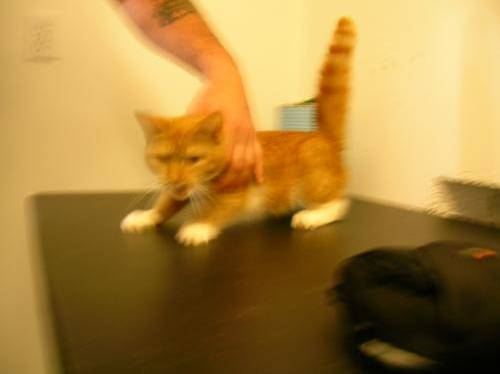

In [ ]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_treino/Cats/cat.0.jpg')

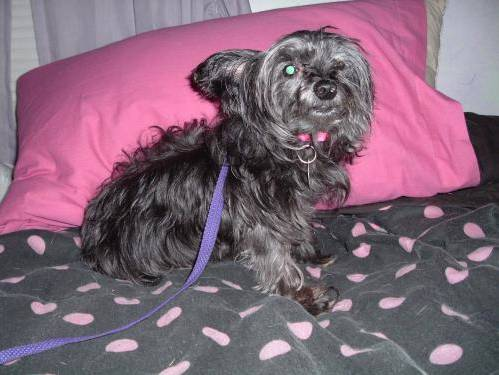

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_treino/Dogs/dog.0.jpg')

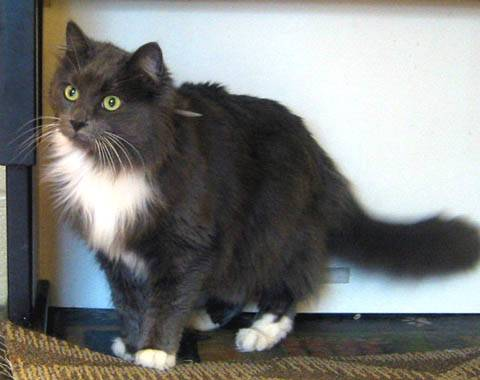

In [ ]:
Image(filename = '/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_test/teste/9.jpg')

In [32]:
# Importar o TF, o K e suas funções necessárias
# import tensorflow as tf
import keras as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [33]:
classifier = Sequential()

In [34]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [54]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 711 images belonging to 2 classes.


**Treinamento**

In [55]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 25)

<ipython-input-55-58c9413f536b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/25
10/10 [==============================] - 14s 2s/step - loss: 0.5105 - accuracy: 0.7469
Epoch 2/25
10/10 [==============================] - 5s 461ms/step - loss: 0.4488 - accuracy: 0.7729
Epoch 3/25
10/10 [==============================] - 4s 378ms/step - loss: 0.4854 - accuracy: 0.7831
Epoch 4/25
10/10 [==============================] - 4s 400ms/step - loss: 0.4757 - accuracy: 0.7750
Epoch 5/25
10/10 [==============================] - 7s 695ms/step - loss: 0.4731 - accuracy: 0.7763
Epoch 6/25
10/10 [==============================] - 3s 312ms/step - loss: 0.4632 - accuracy: 0.7661
Epoch 7/25
10/10 [==============================] - 4s 439ms/step - loss: 0.4664 - accuracy: 0.7906
Epoch 8/25
10/10 [==============================] - 4s 411ms/step - loss: 0.4531 - accuracy: 0.7831
Epoch 9/25
10/10 [==============================] - 4s 342ms/step - loss: 0.4507 - accuracy: 0.7750
Epoch 10/25
10/10 [==============================] - 3s 322ms/step - loss: 0.4086 - accuracy: 0.8237
E

**Previsão - Testar o modelo**

1/1 [==============================] - 0s 24ms/step
Previsão: Cachorro.
Acurácia: (100.0, 2) %.


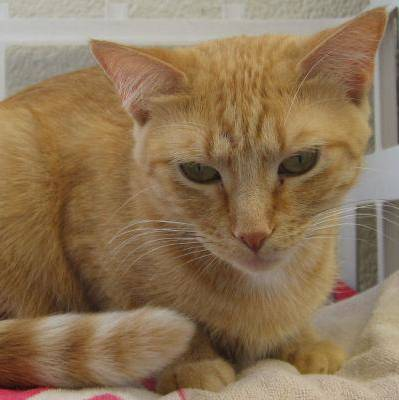

In [62]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_test/teste/45.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro.'
    accuracy = result[0][0] * 100, 2  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = result[0][0] * 100, 2  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/Colab Notebooks/Aula 7 - Criando um modelo/Dataset_test/teste/45.jpg')
